# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report, cohen_kappa_score
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression

In [86]:
df = pd.read_excel('GermanCredit.xlsx')
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [87]:
df.shape

(1000, 3)

- **`We have 1000 rows and 3 columns in the given German dataset.`**

# 3. Plot Histogram for column 'CreditAmount'

<AxesSubplot:xlabel='CreditAmount', ylabel='Count'>

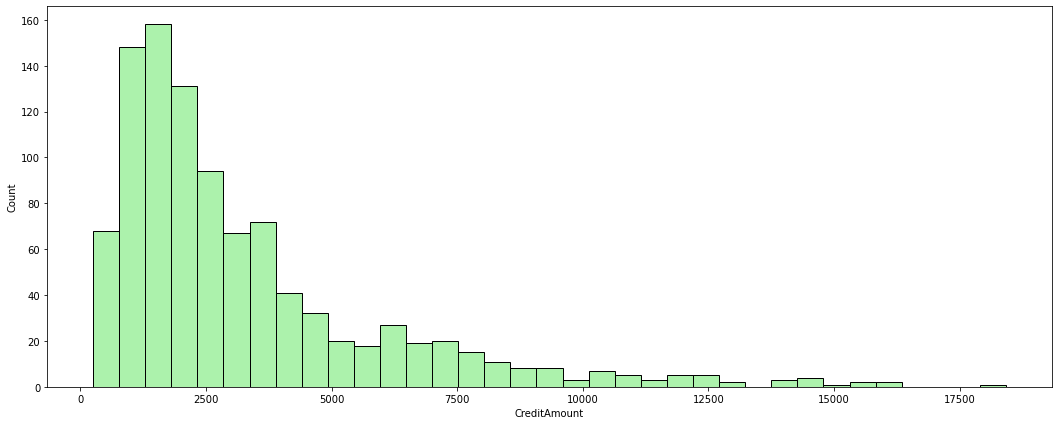

In [136]:
plt.figure(figsize=[18,7])
sns.histplot(df['CreditAmount'],color='lightgreen',edgecolor='black')

# 3b. Create creditability dataframe

In [92]:
creditability = pd.DataFrame(df['Creditability'])
creditability.head(2)

,Creditability
0,1
1,1


In [93]:
creditability.dtypes

Creditability    int64
dtype: object

In [95]:
creditability['Creditability'] = creditability['Creditability'].astype(object)

In [98]:
creditability = pd.get_dummies(creditability,drop_first=False)
creditability.head()

,Creditability_0,Creditability_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [108]:
df_concat = pd.concat([df,creditability])
df_concat.head(2)

,Creditability,CreditAmount,DurationOfCreditInMonths,Creditability_0,Creditability_1
0,1.0,1049.0,18.0,NaN,NaN
1,1.0,2799.0,9.0,NaN,NaN


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

In [111]:
df.head(2)

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9


<AxesSubplot:xlabel='Creditability', ylabel='count'>

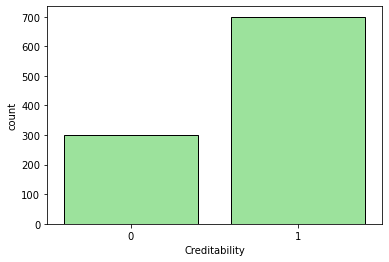

In [135]:
sns.countplot(df['Creditability'],color='lightgreen',edgecolor='black')

In [115]:
df['Creditability'].value_counts(normalize=True)*100

1    70.0
0    30.0
Name: Creditability, dtype: float64

## `The data in the target varible is not imbalanced.`

# 6. Prepare input data for the model

In [117]:
X = df.drop('Creditability',axis=1)
y = df['Creditability']

Xc = sm.add_constant(X)

# 7. Fit logistic regression model

In [118]:
log_reg_model = sm.Logit(y, Xc).fit()
log_reg_model.summary()

Optimization terminated successfully.
         Current function value: 0.588276
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Creditability   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Mon, 28 Jun 2021   Pseudo R-squ.:                 0.03698
Time:                        15:46:34   Log-Likelihood:                -588.28
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 1.549e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.6701      0.147     11.390      0.000       1.383       1.957
CreditAmount               -2.3e-05   3.06e-05     -0.752      0.452   -8.29e-05    3.69e-05
DurationOfCreditInMonths    -0.0341      0.007     -4.685      0.000      -0.048      -0.020
============================================================================================
"""

# 8. Test accuracy calculation

In [122]:
y_pred_prob = log_reg_model.predict(Xc)
y_pred_prob[:5]

0    0.737278
1    0.785609
2    0.775798
3    0.770632
4    0.770433
dtype: float64

**`keeping the threshold probablity as  0.5 and calculating the y predicted values.`**

In [123]:
y_pred = [0 if x<0.5 else 1   for x in y_pred_prob]
y_pred[:5]

[1, 1, 1, 1, 1]

In [124]:
print('The accuracy of the model is: ',metrics.accuracy_score(y, y_pred))

The accuracy of the model is:  0.708


# 9. Build a confusion matrix

<AxesSubplot:>

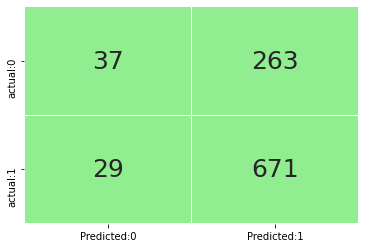

In [131]:
cm = confusion_matrix(y, y_pred)
con_mat = pd.DataFrame(cm, index=['actual:0','actual:1'], columns=['Predicted:0','Predicted:1'])
sns.heatmap(con_mat, annot=True, fmt='d', cbar=False, cmap=['lightgreen'], linewidths=0.1, annot_kws={'size':25})

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

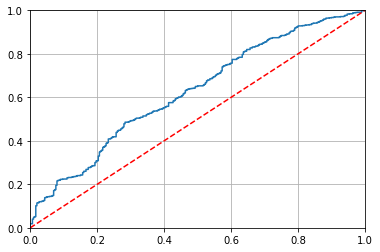

In [141]:
fpr, tpr, threshold = roc_curve(y,y_pred_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.grid()